<center><h1>SARSA implementation </h1></center>

In [1]:
import numpy as np
import sys

from collections import defaultdict

from windy_grid_world import WindyGridworldEnv

import matplotlib.pyplot as plt


## Playing with environment

In [2]:
env = WindyGridworldEnv()

In [3]:
print(env.reset())
env.render()

30
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



In [4]:
print(env.step(1))
env.render()

(31, -1.0, False, {'prob': 1.0})
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o



## SARSA algorithm

In [5]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [6]:
def sarsa(env, max_iter, discount=1.0, alpha=0.5, epsilon=0.1):
    hist_rewards = []


    Q = defaultdict(lambda : np.zeros(env.action_space.n))
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)


    for i_episode in range(max_iter):
        if (i_episode + 1) % 1 == 0:
                print("\rEpisode {}/{}.".format(i_episode + 1, max_iter), end="")
                sys.stdout.flush()

        obs =  env.reset()

        a = np.random.choice(list(range(env.action_space.n)),p=policy(obs))
        done = False
        n_step = 0
        reward_ep = 0

        while not done: # and(n_step < max_steps):
            n_step += 1
            obs_p, reward, done, _ = env.step(a)

            a_p = np.random.choice(list(range(env.action_space.n)),p=policy(obs_p))

            Q[obs][a] = Q[obs][a] + alpha * (reward + discount * Q[obs_p][a_p] - Q[obs][a])

            obs = obs_p
            a = a_p

            # Keep track
            reward_ep += reward

        hist_rewards.append(reward_ep)
    return Q, hist_rewards
        

## Hyperparameters

In [7]:
max_iter = 300
epsilon = 0.1
alpha = 0.5
discount = 1.0

In [8]:
Q, hist_rewards = sarsa(env,max_iter=max_iter, discount=discount, alpha=alpha, epsilon=epsilon)

Episode 300/300.

## Results evaluation

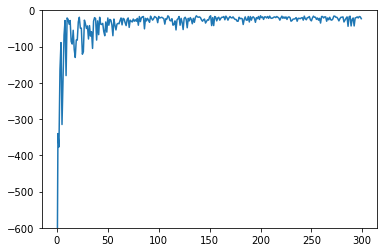

In [9]:
plt.plot(hist_rewards)
plt.ylim(-600,0)
plt.show()

## Optimal policy 

In [10]:
obs = env.reset()
env.render()
done = False
while not done:
    action = np.argmax(Q[obs])
    obs, reward, done, _ = env.step(action)
    env.render()

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o

o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o
o  o  o  o  o  o  o  T  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o